<a href="https://colab.research.google.com/github/DmitriiDenisov/research_oversampling/blob/master/Research_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.
- One random point
- 2D plane

In [0]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [0]:
# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [3]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 3.52524732 19.9994757 ]
 [ 6.2493165  12.24024035]]
[ 2.72406918 -7.75923534]


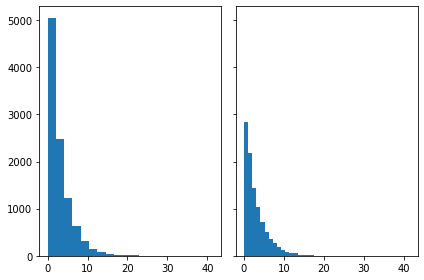

In [4]:
# JUST CHECKING how Gamma dist is look like

N_points = 100000
n_bins = 20

shape, scale = 1., 3.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=n_bins)
axs[1].hist(s, bins=2*n_bins)
plt.show()

In [0]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [0]:
gamma_coeff = generate_gamma()

In [0]:
# Generates new point on line between two initial points
def generate_point_on_line(start_point, v, gamma_coeff):
    return start_point + v * gamma_coeff

In [0]:
generated_point = generate_point_on_line(two_points[0], v, gamma_coeff)

In [9]:
# For visualazion:
initial_points_and_generated = np.concatenate((two_points, generated_point[np.newaxis, :]), axis=0)
initial_points_and_generated

array([[ 3.52524732, 19.9994757 ],
       [ 6.2493165 , 12.24024035],
       [ 4.14734723, 18.22748707]])

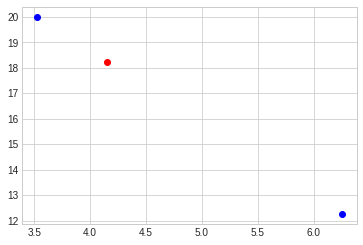

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_point[np.newaxis, :]))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');

## 2.
- Multiple Random points
- 2D plane

In [0]:
NUM_RAND_POINTS = 20

In [12]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[3.09255642 0.65746773]
 [1.54065712 6.23002526]]
[-1.55189929  5.57255753]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

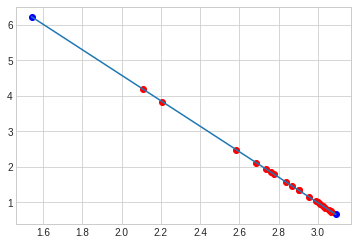

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
plt.plot(initial_x, initial_y, '-');

In [15]:
generated_points

array([[2.90271979, 1.3391328 ],
       [3.02486276, 0.90054201],
       [2.9021156 , 1.34130232],
       [3.06975329, 0.73934917],
       [2.58567478, 2.47757752],
       [2.87049825, 1.45483383],
       [2.9892811 , 1.02830859],
       [2.2061473 , 3.84038417],
       [3.05782764, 0.78217177],
       [2.99898612, 0.9934598 ],
       [2.83866831, 1.56912874],
       [3.01063745, 0.95162224],
       [3.06590791, 0.75315715],
       [2.77757707, 1.78849507],
       [2.68640263, 2.1158841 ],
       [2.95591479, 1.14812028],
       [2.73594625, 1.93798296],
       [2.76066238, 1.8492323 ],
       [2.10669547, 4.19749564],
       [3.0389308 , 0.85002651]])

In [16]:
two_points

array([[3.09255642, 0.65746773],
       [1.54065712, 6.23002526]])

## 3.
- One Random point
- n dimentional space

In [0]:
# Generates n random points in hypercube [xy_min; xy_max]
def generate_random_point_nd(num_points=2, n=10, min_=0, max_=10):
    xy_min = [min_] * n
    xy_max = [max_] * n
    data = np.random.uniform(low=xy_min, high=xy_max, size=(num_points, n))
    return data

In [18]:
two_points_nd = generate_random_point_nd(num_points=2, n=10)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == 10
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[5.91218061 4.91705575 3.94396923 8.91934886 7.40306902 1.00066692
  7.08431223 8.389947   4.47111984 0.71776881]
 [0.8637765  9.14230242 5.08093501 9.95896063 3.09678381 9.06283205
  5.7421585  2.12594309 3.66747959 6.64921948]]
[-5.0484041   4.22524667  1.13696578  1.03961177 -4.30628522  8.06216513
 -1.34215373 -6.26400391 -0.80364025  5.93145067]


In [0]:
gamma_coeff = generate_gamma()

In [20]:
generated_point = generate_point_on_line(two_points_nd[0], v, gamma_coeff)
generated_point

array([5.58810186, 5.18829249, 4.01695595, 8.986086  , 7.12663008,
       1.51821193, 6.99815362, 7.98783369, 4.41953072, 1.09853411])

In [0]:
def test_points_on_line(p1, p2, list_p3, tol=0.0001):
    # Calculate two vectors and check if they are collinear
    if len(list_p3.shape) == 1:
        list_p3 = list_p3[np.newaxis, :]
    vec_1 = p2 - p1
    for p3 in list_p3:
        vec_2 = (p3 - p1) / vec_1 
        if  not all(abs(temp - vec_2[0]) < tol for temp in vec_2):
            return False
    return True

In [0]:
# Testing
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_point)

## 4.
- Multiple Random points
- n dimentional space

In [0]:
NUM_RAND_POINTS = 20
N_FEATURES = 10

In [24]:
two_points_nd = generate_random_point_nd(num_points=2, n=N_FEATURES)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == N_FEATURES
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[0.44856275 3.57171416 3.38654801 8.18920008 2.706761   2.85013297
  0.78408727 1.66872158 5.00827831 2.18429781]
 [4.35071422 1.53810701 5.27196853 2.996127   9.37697621 4.22962861
  1.59748039 0.29571143 3.35909489 4.00952589]]
[ 3.90215147 -2.03360714  1.88542053 -5.19307308  6.67021521  1.37949564
  0.81339312 -1.37301014 -1.64918342  1.82522808]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)
    
assert generated_points.shape[0] == NUM_RAND_POINTS
assert generated_points.shape[1] == N_FEATURES

In [0]:
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_points)

## 5.
- Generalization of the approach for n minority points for n dimentional space

In [0]:
NUM_RAND_POINTS = 20
NUM_MINORITY_POINTS = 5
N_FEATURES = 10
NUM_TO_ADD = 15

In [0]:
minority_points_nd = generate_random_point_nd(num_points=NUM_MINORITY_POINTS, n=N_FEATURES)
assert minority_points_nd.shape[0] == NUM_MINORITY_POINTS
assert minority_points_nd.shape[1] == N_FEATURES
# print(two_points_nd)
# get vector for these two points
# v = get_vector_two_points(N_points_nd)
# print(v)

In [0]:
def generate_points_for_n_minority(minority_points, num_to_add):
  dict_ans = defaultdict(lambda: np.array([]).reshape(0, N_FEATURES))
  # Choose random pairs with repetition:
  all_comb = np.array(list(itertools.combinations(range(len(minority_points)), r=2)))
  rand_idx = np.random.choice(range(len(all_comb)), num_to_add, replace=True)
  assert rand_idx.shape == (num_to_add, )
  # print(rand_idx)
  # print(all_comb)
  all_comb = all_comb[rand_idx]
  # assert random_choice_minority.shape[0] == num_to_add and random_choice_minority.shape[1] == 2
  for i, (idx1, idx2) in enumerate(all_comb):
    v = get_vector_two_points([minority_points[idx1], minority_points[idx2]])
    gamma_coeff = generate_gamma()
    generated_point = generate_point_on_line(minority_points[idx1], v, gamma_coeff)
    dict_ans[tuple(all_comb[i])] = np.vstack([dict_ans[tuple(all_comb[i])], generated_point])
    
  return dict_ans

dict_ans = generate_points_for_n_minority(minority_points_nd, num_to_add=NUM_TO_ADD)

In [0]:
# testing:
n_points = 0
for key, points in dict_ans.items():
  for point in points:
    n_points+=1
    assert test_points_on_line(minority_points_nd[key[1]], minority_points_nd[key[0]], point)
assert n_points == NUM_TO_ADD